# Linear & Non Linear Regression Notebook

Notebook to experiment solely with Linear Regression Models

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
master = pd.read_parquet('master.parquet',engine='fastparquet')

In [3]:
master = master.select_dtypes(include=['float64','int64'])

In [4]:
master=master.fillna(0)

In [5]:
X = master.drop('price_y', axis = 1)

In [6]:
y = master['price_y']

In [7]:
lm = LinearRegression()

In [8]:
lm.fit(X,master['price_y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print 'Estimated intercept coefficient: ', lm.intercept_

Estimated intercept coefficient:  -554427.907115


In [10]:
print 'Number of coefficients: ', len(lm.coef_)

Number of coefficients:  41


In [11]:
pd.DataFrame(zip(X.columns, lm.coef_), columns=['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,id,-1.928936e+05
1,scrape_id,2.532033e-08
2,host_id,2.396118e-07
3,host_listings_count,4.358779e-02
4,host_total_listings_count,4.358779e-02
5,neighbourhood_group_cleansed,-2.109846e-11
6,zipcode,-3.551569e-04
7,latitude,-4.232657e+01
8,longitude,-3.880911e+02
9,accommodates,1.403697e+01


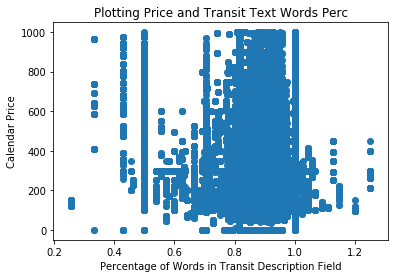

In [12]:
plt.scatter(master.transitTextWordsPerc, master.price_y)
plt.xlabel("Percentage of Words in Transit Description Field")
plt.ylabel("Calendar Price")
plt.title("Plotting Price and Transit Text Words Perc")
plt.show()


In [13]:
lm.predict(X)[0:390]


array([ 120.0295201 ,  120.0295201 ,  120.0295201 ,  120.0295201 ,
        120.0295201 ,  120.0295201 ,  120.0295201 ,  120.0295201 ,
        120.0295201 ,  120.0295201 ,  120.0295201 ,  120.0295201 ,
        120.0295201 ,  120.0295201 ,  120.0295201 ,  120.0295201 ,
        120.0295201 ,  120.0295201 ,  120.0295201 ,  120.0295201 ,
        120.0295201 ,  120.0295201 ,  120.0295201 ,  120.0295201 ,
        120.0295201 ,  120.0295201 ,  120.0295201 ,  120.0295201 ,
        120.0295201 ,  120.0295201 ,  120.0295201 ,  120.0295201 ,
        120.0295201 ,  120.0295201 ,  120.0295201 ,  120.0295201 ,
        120.0295201 ,  120.0295201 ,  120.0295201 ,  120.0295201 ,
        120.0295201 ,  120.0295201 ,  120.0295201 ,  120.0295201 ,
        120.0295201 ,  120.0295201 ,  120.0295201 ,  120.0295201 ,
        120.0295201 ,  120.0295201 ,  120.0295201 ,  120.0295201 ,
        120.0295201 ,  120.0295201 ,  120.0295201 ,  120.0295201 ,
        120.0295201 ,  120.0295201 ,  120.0295201 ,  120.02952

#Problem: we have many calendar days for the same listings. For each listing, one price prediction is made but because
#we have many calendar days for each listing, the above outputs the same result for each cal day
#Make better representation

More Regressions

In [14]:
from sklearn import linear_model

Lasso Lars Regression

In [15]:
ll = linear_model.LassoLars(alpha=.1)
ll.fit(X, y)

LassoLars(alpha=0.1, copy_X=True, eps=2.2204460492503131e-16,
     fit_intercept=True, fit_path=True, max_iter=500, normalize=True,
     positive=False, precompute='auto', verbose=False)

In [16]:
ll.coef_

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

Bayesian Ridge Regression

In [17]:
br = linear_model.BayesianRidge()

In [18]:
br.fit(X,y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [19]:
br.coef_

array([  6.84204404e-03,   3.08408189e-03,   2.39978480e-07,
         4.31929046e-02,   4.39302888e-02,  -2.60758945e-06,
        -3.55178784e-04,  -4.19136184e+01,  -3.87232791e+02,
         1.40420409e+01,  -9.77366540e+00,   3.51575396e+01,
        -4.61085946e-01,   4.90572413e-02,   3.66746486e+00,
        -9.90725595e-01,  -5.79924128e-05,   5.15009750e-08,
         3.66446996e-01,   7.22436213e-01,  -3.48569003e-01,
        -2.26501482e-02,  -9.73434745e-02,   4.95917447e-01,
         9.00326990e+00,   5.56195812e+00,  -2.05536781e+01,
         8.27104183e-02,   1.68862066e+00,  -1.73086165e+00,
         1.51813895e-10,   1.17532329e-01,  -8.44174705e+00,
        -6.84206267e-03,   2.05273093e-01,  -8.87250639e-01,
        -2.03336624e-01,  -8.03594529e-01,   7.90088456e+00,
         3.49348918e+01,   6.97211457e+00])

Stochastic Gradient Descent

In [20]:
X_trunc = X.head(10000)

In [21]:
y_trunc = y.head(10000)

In [22]:
sgd = linear_model.SGDClassifier()
sgd.fit(X_trunc, y_trunc)

/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [23]:
sgd.coef_

array([[ -4.57486068e+08,  -2.02007637e-02,  -1.43315704e+09, ...,
         -3.46187692e+00,   5.29424108e+00,   3.52966636e+00],
       [ -1.89386347e+07,   2.81586404e-02,  -4.60261162e+07, ...,
         -3.94037551e-01,   3.29922032e-01,  -1.52245791e-01],
       [ -4.33748956e+06,   3.18315065e-02,  -1.00802671e+07, ...,
         -1.17405234e-01,   1.17405234e-01,  -2.97397001e-02],
       ..., 
       [  3.64307712e+08,  -3.95315716e+12,   1.22301748e+08, ...,
         -8.07784858e+00,   5.56783930e+00,   2.01758405e+01],
       [  1.28767319e+08,  -3.95315716e+12,   6.58042784e+08, ...,
          2.17144204e+00,  -3.82274641e+00,  -2.29598774e+00],
       [  1.61189270e+08,  -3.95315716e+12,   1.45415351e+09, ...,
          3.27388552e+00,  -5.05642197e+00,  -3.53070354e+00]])

Non Linear Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[  1.00000000e+00,   1.31246810e+07,   2.01607062e+13, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.31246810e+07,   2.01607062e+13, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.31246810e+07,   2.01607062e+13, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.00000000e+00,   9.14712800e+06,   2.01607062e+13, ...,
          1.37164191e-02,   1.05510916e-03,   8.11622433e-05],
       [  1.00000000e+00,   9.14712800e+06,   2.01607062e+13, ...,
          1.37164191e-02,   1.05510916e-03,   8.11622433e-05],
       [  1.00000000e+00,   9.14712800e+06,   2.01607062e+13, ...,
          1.37164191e-02,   1.05510916e-03,   8.11622433e-05]])

In [26]:
poly = PolynomialFeatures(degree=3)
poly.fit_transform(X)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/site-packages/IPython/core/ultratb.py", line 358, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/inspect.py", line 1051, in getinnerframes
    framelist.append((tb.tb_frame,) + getframeinfo(tb, context))
  File "/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/inspect.py", line 1011, in getframeinfo
    filename = getsourcefile(frame) or getfile(frame)
  File "/Users/pauldefusco/anaconda2/envs/py27/lib/python2.7/inspect.p

IndexError: string index out of range

In [ ]:
poly = PolynomialFeatures(degree=4)
poly.fit_transform(X)